In [10]:
!wc -l ../eval/result/*.csv

   10001 ../eval/result/center_miou.csv
   10001 ../eval/result/center_oracle_miou.csv
   10001 ../eval/result/center_oracle_pix_acc.csv
   10001 ../eval/result/center_pix_acc.csv
   10001 ../eval/result/random_miou.csv
   10001 ../eval/result/random_oracle_miou.csv
   10001 ../eval/result/random_oracle_pix_acc.csv
   10001 ../eval/result/random_pix_acc.csv
   80008 total


In [11]:
!wc -l ../train/*.csv

  10001 ../train/v4_miou.csv
  10001 ../train/v4_pix_acc.csv
  10001 ../train/v5_miou.csv
  10001 ../train/v5_pix_acc.csv
  40004 total


In [12]:
!wc -l ../eval/clip_sam_result/*.csv

   9987 ../eval/clip_sam_result/clip_sam_16_miou.csv
   9987 ../eval/clip_sam_result/clip_sam_16_pix_acc.csv
  10001 ../eval/clip_sam_result/clip_sam_32_miou.csv
  10001 ../eval/clip_sam_result/clip_sam_32_pix_acc.csv
  39976 total


In [2]:
!wc -l ../eval/clipseg_same_result/*.csv

  10001 ../eval/clipseg_same_result/miou.csv
  10001 ../eval/clipseg_same_result/pix_acc.csv
  20002 total


In [3]:
!wc -l ../eval/glip_sam_result/*.csv

  10001 ../eval/glip_sam_result/miou.csv
  10001 ../eval/glip_sam_result/pix_acc.csv
  20002 total


In [2]:
!wc -l ../eval/groundingdino_sam_result/*.csv

  10001 ../eval/groundingdino_sam_result/miou.csv
  10001 ../eval/groundingdino_sam_result/pix_acc.csv
  20002 total


In [6]:
models = {
    '1_point': '../eval/result/center_{}.csv',
    '1_point_oracle': '../eval/result/center_oracle_{}.csv',
    '1_point_random': '../eval/result/random_{}.csv',
    '1_point_random_oracle': '../eval/result/random_oracle_{}.csv',
    'linear_probe_v4': '../train/v4_{}.csv',
    # NOTE(jiahang): dropped v5 due to poor performance
    # 'linear_probe_v5': '../train/v5_{}.csv',
    # NOTE(jiahang): dropped clip_sam_16 due to poor performance 
    # 'clip_sam_16': '../eval/clip_sam_result/clip_sam_16_{}.csv',
    'clip_sam_32': '../eval/clip_sam_result/clip_sam_32_{}.csv',
    'clipseg_sam': '../eval/clipseg_same_result/{}.csv',
    'glip_sam': '../eval/glip_sam_result/{}.csv',
    'gdino_sam': '../eval/groundingdino_sam_result/{}.csv'
}

In [16]:
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 1000)

model_names = []
results = []
for model, csv_tmpl in models.items():
    model_names.append(model)
    df = pd.read_csv(csv_tmpl.format('miou')).set_index('name')
    res = df.mean()
    res['mIOU'] = df.mean(axis=None)
    results.append(res)
df = pd.DataFrame(results, index=model_names)
# this method of calculating mIOU is different
# df['mIOU'] = df.mean(axis=1)
df.loc['Attention+SSL'] = { 'mIOU': 0.473 }
df.loc['UniHCP'] = { 'mIOU': 0.6386 }
df

,Background,Hat,Hair,Glove,Sunglasses,UpperClothes,Dress,Coat,Socks,Pants,Jumpsuits,Scarf,Skirt,Face,Left-arm,Right-arm,Left-leg,Right-leg,Left-shoe,Right-shoe,mIOU
1_point,0.232435,0.696621,0.683715,0.518191,0.511506,0.725082,0.655145,0.682895,0.504714,0.730340,0.515240,0.602005,0.766276,0.490701,0.510718,0.494754,0.566224,0.552957,0.622729,0.627526,0.562551
1_point_oracle,0.370792,0.761832,0.715750,0.579052,0.564120,0.803772,0.773170,0.768472,0.561764,0.791152,0.729270,0.653329,0.829046,0.663285,0.665680,0.663613,0.745411,0.746791,0.680134,0.688814,0.671877
1_point_random,0.181134,0.637770,0.606092,0.439418,0.473157,0.668722,0.574288,0.577341,0.437501,0.642845,0.417127,0.505147,0.721158,0.455405,0.458914,0.449733,0.522878,0.512684,0.541064,0.556739,0.501743
1_point_random_oracle,0.314820,0.711739,0.658069,0.513765,0.540950,0.763200,0.737665,0.721199,0.510563,0.738754,0.683349,0.583697,0.799954,0.623478,0.610485,0.615541,0.697171,0.695866,0.623755,0.639085,0.621790
linear_probe_v4,0.852610,0.559220,0.601609,0.288954,0.251583,0.631603,0.243692,0.471453,0.378516,0.663403,0.105658,0.052382,0.058705,0.617415,0.448962,0.462142,0.387854,0.400580,0.309726,0.322273,0.544753
clip_sam_32,0.000000,0.290005,0.289918,0.083746,0.085038,0.202701,0.387083,0.302819,0.073932,0.363257,0.309509,0.133297,0.312983,0.122913,0.126772,0.127231,0.219345,0.196899,0.075954,0.092525,0.170074
clipseg_sam,0.193566,0.613060,0.575286,0.346401,0.187416,0.479812,0.556002,0.523899,0.140357,0.673070,0.078039,0.345987,0.549415,0.421036,0.169343,0.248914,0.240889,0.237326,0.244914,0.228423,0.370081
glip_sam,0.239868,0.621192,0.323259,0.353534,0.488309,0.302871,0.497016,0.512303,0.210350,0.586441,0.511898,0.282690,0.533410,0.472157,0.148812,0.248067,0.202619,0.230733,0.268965,0.275364,0.339653
gdino_sam,0.270569,0.621610,0.550247,0.373680,0.493888,0.516845,0.592839,0.526494,0.373534,0.652616,0.626606,0.357818,0.704180,0.100842,0.144488,0.168314,0.177077,0.162890,0.224258,0.265475,0.340994
Attention+SSL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.473000


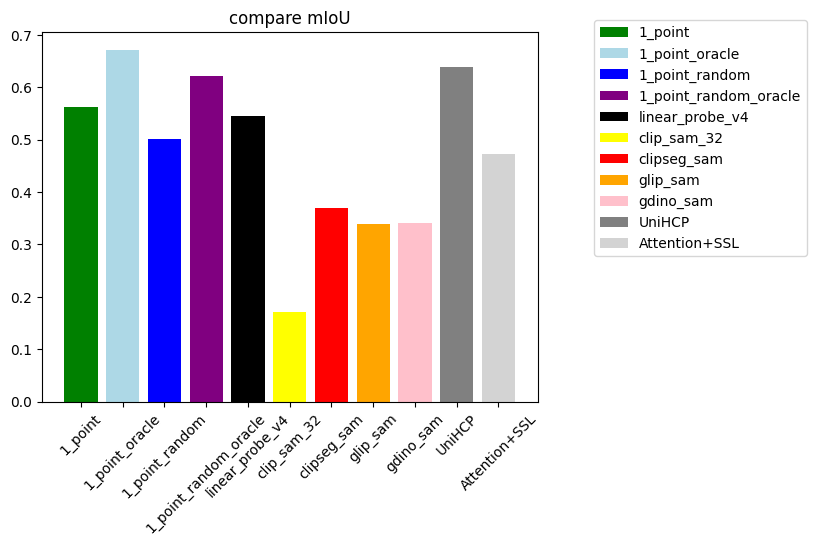

In [9]:
# everything
model_names = []
results = []
for model, csv_tmpl in models.items():
    model_names.append(model)
    results.append(pd.read_csv(csv_tmpl.format('miou')).set_index('name').mean(axis=None))

model_names.append('UniHCP')
results.append(0.6386)

model_names.append('Attention+SSL')
results.append(0.473)

color = ['green', 'lightblue', 'blue', 'purple', 'black', 'yellow', 'red', 'orange', 'pink', 'gray', 'lightgray']
# plt.figure(figsize=(10, 8))
plt.bar(model_names, results, color=color, label=model_names)
plt.xticks(rotation=45)
plt.title('compare mIoU')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('compare.png')

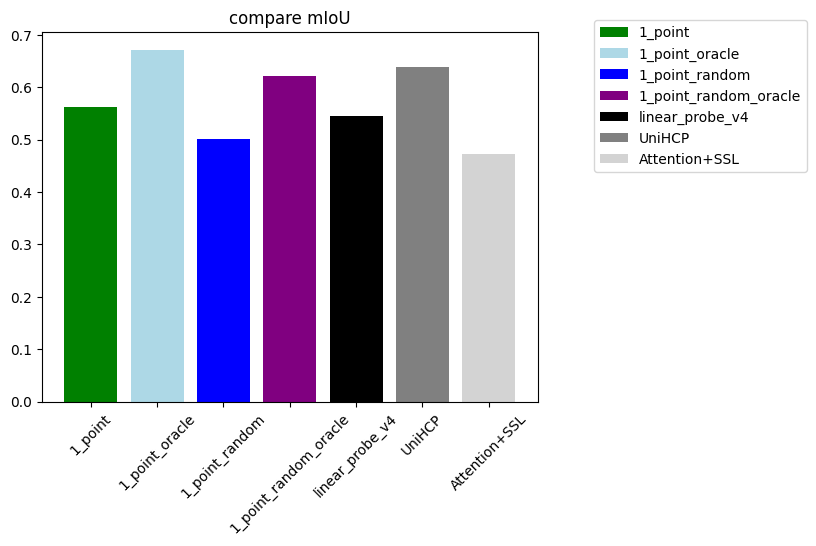

In [12]:
# without zero-shot ones
model_names = []
results = []
for model, csv_tmpl in models.items():
    if 'sam' not in model:
        model_names.append(model)
        results.append(pd.read_csv(csv_tmpl.format('miou')).set_index('name').mean(axis=None))

model_names.append('UniHCP')
results.append(0.6386)

model_names.append('Attention+SSL')
results.append(0.473)

color = ['green', 'lightblue', 'blue', 'purple', 'black', 'gray', 'lightgray']
# plt.figure(figsize=(10, 8))
plt.bar(model_names, results, color=color, label=model_names)
plt.xticks(rotation=45)
plt.title('compare mIoU')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('compare_no_zero.png')

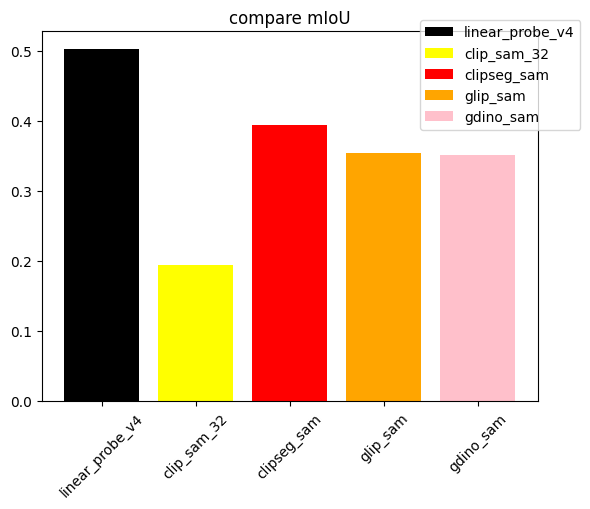

In [14]:
# specifically zero-shot ones, remove background
model_names = []
results = []
for model, csv_tmpl in models.items():
    if 'sam' in model or 'linear' in model:
        model_names.append(model)
        df_one = pd.read_csv(csv_tmpl.format('miou')).set_index('name')
        results.append(df_one.loc[:, df_one.columns != 'Background'].mean(axis=None))

color = ['black', 'yellow', 'red', 'orange', 'pink']
# plt.figure(figsize=(10, 8))
plt.bar(model_names, results, color=color, label=model_names)
plt.xticks(rotation=45)
plt.title('compare mIoU')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('compare_zero.png')

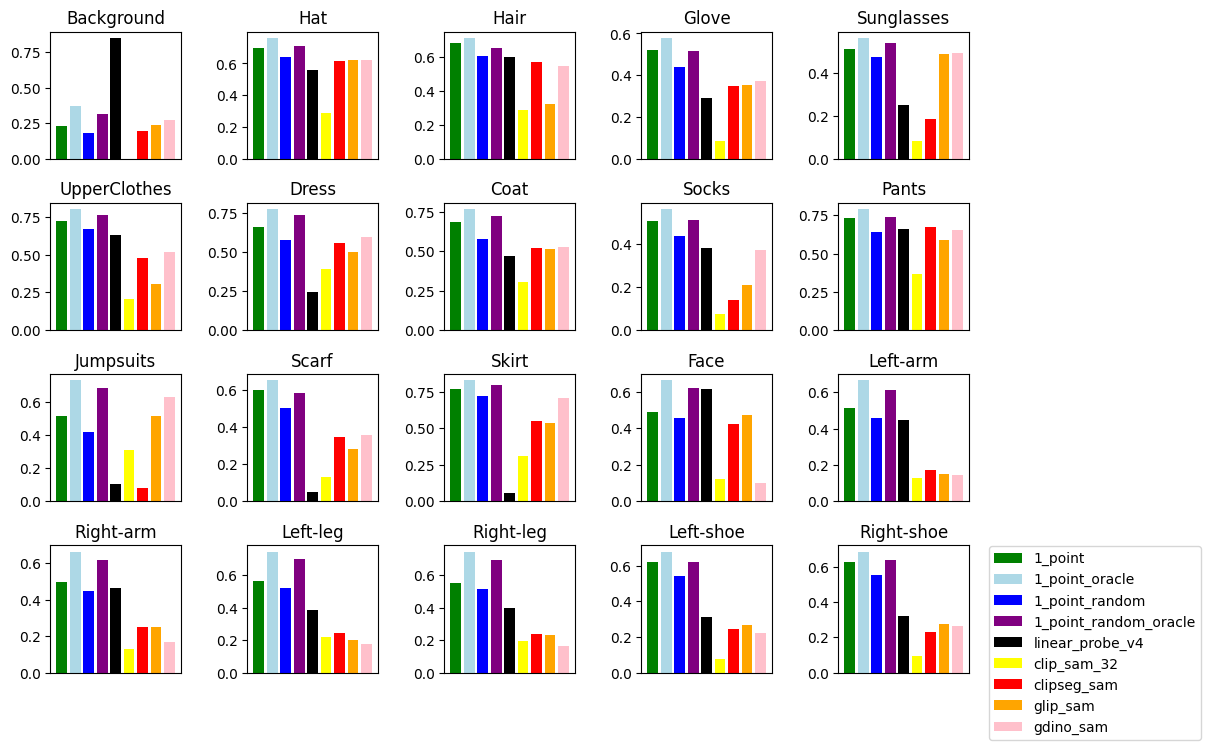

In [15]:
LABELS = """Background
Hat
Hair
Glove
Sunglasses
UpperClothes
Dress
Coat
Socks
Pants
Jumpsuits
Scarf
Skirt
Face
Left-arm
Right-arm
Left-leg
Right-leg
Left-shoe
Right-shoe""".split('\n')

from mpl_toolkits.axes_grid1 import ImageGrid

fig, axes = plt.subplots(4, 5, figsize=(10,7), squeeze=True)
axes = axes.flatten()
fig.tight_layout()

color = ['green', 'lightblue', 'blue', 'purple', 'black', 'yellow', 'red', 'orange', 'pink', 'gray', 'lightgray']
for i, (label, ax) in enumerate(zip(LABELS, axes)):
    model_names = []
    results = []
    for model, csv_tmpl in models.items():
        model_names.append(model)
        results.append(pd.read_csv(csv_tmpl.format('miou')).set_index('name')[label].mean())
    ax.bar(model_names, results, color=color, label=model_names)
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('compare_per_class.png')